In [1]:
import os
print(os.listdir('E:/Programming/VS CODE/Python/7th_sem/Fabric Dataset/Dataset'))

['Muga', 'Tass']


In [2]:
train_Muga='E:/Programming/VS CODE/Python/7th_sem/Fabric Dataset/Train'
valid_Muga='E:/Programming/VS CODE/Python/7th_sem/Fabric Dataset/Test'

In [3]:
train_Muga_names = os.listdir(train_Muga)
print(train_Muga_names[:5])

validation_Muga_names = os.listdir(valid_Muga)
print(validation_Muga_names[:5])

['DSC_9808.JPG', 'DSC_9810.JPG', 'DSC_9811.JPG', 'DSC_9812.JPG', 'DSC_9813.JPG']
['DSC_9808.JPG', 'DSC_9810.JPG', 'DSC_9811.JPG', 'DSC_9812.JPG', 'DSC_9813.JPG']


In [4]:
print('Total numbers of Muga images for Training :', len(os.listdir(train_Muga)))
print('Total numbers of Muga images for Validation :', len(os.listdir(valid_Muga)))

Total numbers of Muga images for Training : 30
Total numbers of Muga images for Validation : 30


In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 3

pic_index = 0

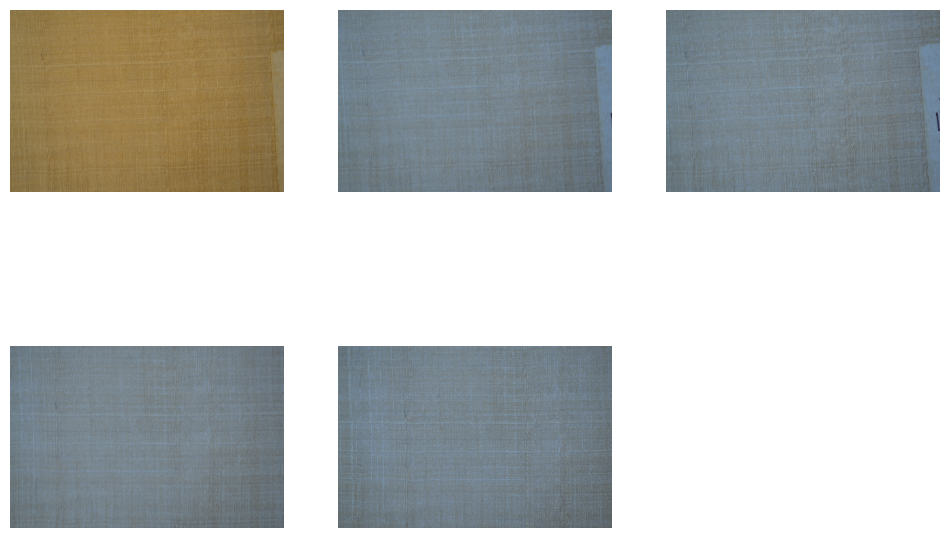

In [6]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 5
next_Muga_pic = [os.path.join(train_Muga, fname)
                for fname in train_Muga_names[pic_index-5:pic_index]]

for i, img_path in enumerate(next_Muga_pic):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#For Augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

#train_datagen = ImageDataGenerator(rescale=1/255)

validation_datagen = ImageDataGenerator(rescale=1/255)

#train_generator = train_datagen.flow_from_directory(
#        '/content/drive/MyDrive/assamsilk/train/',
#        classes = ['eri', 'noneri'],
#        target_size=(200, 200),
#        batch_size=120,
#        class_mode='binary')
train_generator = train_datagen.flow_from_directory(
        'E:/Programming/VS CODE/Python/7th_sem/Fabric Dataset/Dataset',
        classes = ['Muga','Tass'],
        target_size=(200, 200),
        batch_size=120,
        class_mode='binary')

#-------------- Augmentation

#image_gen_train = ImageDataGenerator(
#      rescale=1./255,
#      rotation_range=40,
#      width_shift_range=0.2,
#      height_shift_range=0.2,
#      shear_range=0.2,
#      zoom_range=0.2,
#      horizontal_flip=True,
#      fill_mode='nearest')

#train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
#                                                     directory=train_dir,
#                                                     shuffle=True,
#                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
#                                                     class_mode='binary')


#-----------------------------------------------------------------------------



#validation_generator = validation_datagen.flow_from_directory(
#        '/content/drive/MyDrive/assamsilk/valid/',
#        classes = ['eri', 'noneri'],
#        target_size=(200, 200),
#        batch_size=19,
#        class_mode='binary',
#        shuffle=False)
validation_generator = validation_datagen.flow_from_directory(
        'E:/Programming/VS CODE/Python/7th_sem/Fabric Dataset/Dataset',
        classes = ['Muga','Tass'],
        target_size=(200, 200),
        batch_size=19,
        class_mode='binary',
        shuffle=False)


Found 560 images belonging to 2 classes.
Found 560 images belonging to 2 classes.


In [8]:
#augmented_images = [train_datagen[0][0][0] for i in range(5)]
#plotImages(augmented_images)

In [9]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [27]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (200,200,3)),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [12]:
# resize_and_rescale = tf.keras.Sequential([
#     layers.experimental.preprocessing.Rescaling(1.0/255)
# ])

# data_augmentation = tf.keras.Sequential([
#     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#     layers.experimental.preprocessing.RandomRotation(0.2)

# ])

In [15]:
# model = models.Sequential([
#     # resize_and_rescale,
#     # data_augmentation,
#     tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64,activation='relu'),
#     tf.keras.layers.Dense(len(class_names),activation='softmax'),
# ])

In [31]:
model = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
   tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),

   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),

   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),

   tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(512, activation='relu'),
   tf.keras.layers.Dense(2)
])


In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)      

In [33]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [34]:
# history = model.fit(
#       train_generator,
#       steps_per_epoch=2,
#       epochs=15,
#       verbose=1,
#       validation_data = validation_generator,
#       validation_steps=8)

history = model.fit(train_generator,
      steps_per_epoch=1,
      epochs=15, #10,
      verbose=1,
      validation_data = validation_generator)
# model.save("/content/drive/MyDrive/Dataset/DatasetMuga/Folder7_Muga_Tass/MugaTass_CNN/")


Epoch 1/15


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_2/dense_4/Relu' defined at (most recent call last):
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 595, in run_forever
      self._run_once()
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1881, in _run_once
      handle._run()
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Wrishav\AppData\Local\Temp\ipykernel_16992\3864745073.py", line 9, in <cell line: 9>
      history = model.fit(train_generator,
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\activations.py", line 321, in relu
      return backend.relu(
    File "c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'sequential_2/dense_4/Relu'
Matrix size-incompatible: In[0]: [120,12800], In[1]: [6272,512]
	 [[{{node sequential_2/dense_4/Relu}}]] [Op:__inference_train_function_6023]

In [21]:
model.evaluate(validation_generator)

30/30 [==============================] - 33s 1s/step - loss: 1.7623 - accuracy: 0.7125


[1.762272834777832, 0.7124999761581421]

In [22]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

30/30 [==============================] - 33s 1s/step


In [23]:
fpr, tpr, _ = roc_curve(train_generator.classes, preds)

In [24]:
roc_auc = auc(fpr, tpr)

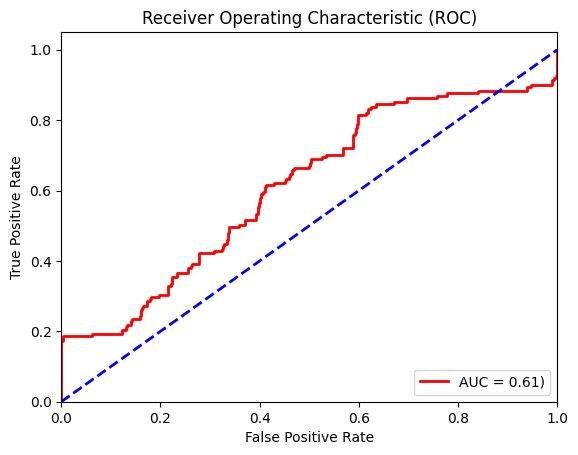

In [25]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

1/1 [==============================] - 0s 49ms/step
[0.]
E:/Programming/VS CODE/Python/7th_sem/Fabric Dataset/Train/DSC_9836.JPG - This is an image of an Tass Fabric


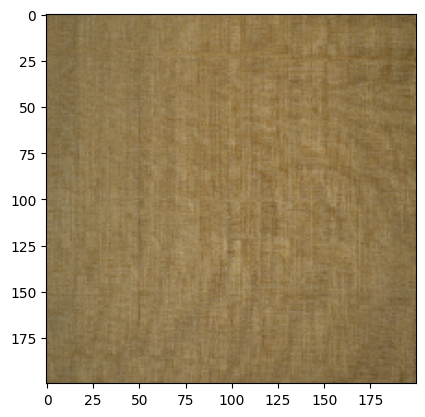

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Upload images and make predictions
uploaded_files = [train_Muga+"/"+train_Muga_names[25]]  # Replace with the filenames you've uploaded
for fn in uploaded_files:
    path = fn
    img = image.load_img(path, target_size=(200, 200))
    x = image.img_to_array(img)
    plt.imshow(x/255.)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0] < 0.5:
        print(fn + " - This is an image of an Tass Fabric")
    else:
        print(fn + " - This is an image of a Muga Fabric")
